In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
num_of_players = 7
num_spies = 2
num_civilians = num_of_players - num_spies
rounds = 5
num_of_outputs = 10000

# Random Vote Out

In [ ]:
def random_strategy(num_of_players, num_spies, rounds):

    players = ["Player " + str(i + 1) for i in range(num_of_players)]
    spies = random.sample(players, num_spies)

    spies_wins = 0
    civilians_wins = 0
    voted_out = []

    for round in range(1, rounds + 1):
        if round <= 2:
            num_players = 3
        else:
            if round <= 4:
                num_players = 4
            else:
                num_players = 5

        if len(players) < num_players:
            spies_wins += 1
            break

        playing_players = random.sample(players, num_players)

        submitted_cards = [
                "Picture" if ((player in spies) and (random.random() < 0.5)) else "Number"
                for player in playing_players
            ]

        if "Picture" in submitted_cards:
            spies_wins += 1
            suspect = random.choice(playing_players)
            players.remove(suspect)
            voted_out.append(suspect)
        else:
            civilians_wins += 1

    return spies_wins > civilians_wins

In [ ]:
spies_games_wins_1 = [random_strategy(num_of_players, num_spies, rounds) for _ in range(num_of_outputs)]

In [ ]:
spy_game_wins = spies_games_wins_1.count(True)
civil_game_wins = spies_games_wins_1.count(False)

total_elements = len(spies_games_wins_1)

spy_percentage_1 = (spy_game_wins / total_elements) * 100
civil_percentage_1 = (civil_game_wins / total_elements) * 100

print(f"Percentage of SPY wins: {spy_percentage_1:.2f}%")
print(f"Percentage of Civilian wins: {civil_percentage_1:.2f}%")

Percentage of SPY wins: 39.77%
Percentage of Civilian wins: 60.23%


In [ ]:
result = random_strategy(num_of_players, num_spies, rounds)

print(result)

False


# Suspecting With History

In [ ]:
import random

def history_strategy(num_of_players, num_spies, rounds):

    players = ["Player " + str(i + 1) for i in range(num_of_players)] #iterating over the players
    spies = random.sample(players, num_spies)

    spies_wins = 0
    civilians_wins = 0
    voted_out = []
    history = []

    for round in range(1, rounds + 1):
        num_players = 3 if round <= 2 else 4 if round <= 4 else 5 #players in each round

        if len(players) < num_players:
            spies_wins += 1
            break

        playing_players = random.sample(players, num_players)

        submitted_cards = ["Picture" if player in spies and random.random() < 0.5 else "Number" for player in playing_players]

        history.append(
            {
                'round': round,
                'players': playing_players,
                'cards': submitted_cards
            }
        )

        if "Picture" in submitted_cards:
            spies_wins += 1

            if round == 1:
                suspect = random.choice(playing_players)
                players.remove(suspect)
                voted_out.append(suspect)
            else:
                intersection_of_spywin_rounds = list(set(player for history_round in history if "Picture" in history_round['cards'] for player in history_round['players']).intersection(playing_players))

                if intersection_of_spywin_rounds:
                    suspect = random.choice(intersection_of_spywin_rounds)
                    players.remove(suspect)
                    voted_out.append(suspect)

        else:
            civilians_wins += 1

    return spies_wins > civilians_wins

In [ ]:
spies_games_wins_2 = [history_strategy(num_of_players, num_spies, rounds) for _ in range(num_of_outputs)]

In [ ]:
spy_game_wins = spies_games_wins_2.count(True)
civil_game_wins = spies_games_wins_2.count(False)

total_elements = len(spies_games_wins_2)

spy_percentage_2 = (spy_game_wins / total_elements) * 100
civil_percentage_2 = (civil_game_wins / total_elements) * 100

print(f"Percentage of SPY wins: {spy_percentage_2:.2f}%")
print(f"Percentage of Civilian wins: {civil_percentage_2:.2f}%")

Percentage of SPY wins: 39.08%
Percentage of Civilian wins: 60.92%


# Voting Mechanism

In [ ]:
def voting_time(round_playing_players, spies, players):

    votes = []

    for player in players:

        vote_choices = list(round_playing_players)

        # player will not vote himself suspect
        if player in vote_choices:
            vote_choices.remove(player)

        # spy will not vote spy
        if player in spies:
            vote_choices = [x for x in vote_choices if x not in spies]

        votes.append(random.choice(vote_choices))

    # Initialize an empty dictionary to store counts
    count_dict = {}

    # Count votes using a loop
    for vote in votes:
        if vote in count_dict:
            count_dict[vote] += 1
        else:
            count_dict[vote] = 1

    max_count_vote = max(count_dict, key=count_dict.get)

    return max_count_vote

In [ ]:
def voting_mechanism(num_of_players, num_spies, rounds):

    players = ["Player " + str(i + 1) for i in range(num_of_players)]
    spies = random.sample(players, num_spies)

    spies_wins = 0
    civilians_wins = 0
    voted_out = []

    for round in range(1, rounds + 1):
        if round <= 2:
            num_players = 3
        else:
            if round <= 4:
                num_players = 4
            else:
                num_players = 5

        if len(players) < num_players:
            spies_wins += 1
            break

        playing_players = random.sample(players, num_players)

        submitted_cards = [
                "Picture" if ((player in spies) and (random.random() < 0.5)) else "Number"
                for player in playing_players
            ]

        if "Picture" in submitted_cards:
            spies_wins += 1

            # suspect = random.choice(playing_players)
            suspect = voting_time(playing_players, spies, players)

            players.remove(suspect)
            voted_out.append(suspect)
        else:
            civilians_wins += 1

    return spies_wins > civilians_wins

In [ ]:
spies_games_wins_3 = [voting_mechanism(num_of_players, num_spies, rounds) for _ in range(num_of_outputs)]

In [ ]:
spy_game_wins = spies_games_wins_3.count(True)
civil_game_wins = spies_games_wins_3.count(False)

total_elements = len(spies_games_wins_3)

spy_percentage_3 = (spy_game_wins / total_elements) * 100
civil_percentage_3 = (civil_game_wins / total_elements) * 100

print(f"Percentage of SPY wins: {spy_percentage_3:.2f}%")
print(f"Percentage of Civilian wins: {civil_percentage_3:.2f}%")

Percentage of SPY wins: 45.04%
Percentage of Civilian wins: 54.96%


# LETS COMPARE

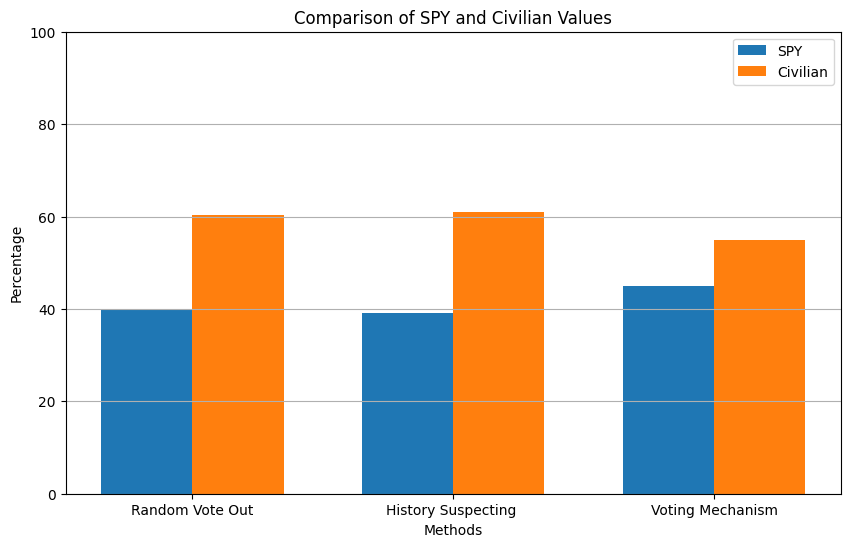

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
spy_values = [spy_percentage_1, spy_percentage_2, spy_percentage_3]
civilian_values = [civil_percentage_1, civil_percentage_2, civil_percentage_3]
x_axis = ['Random Vote Out',  'History Suspecting ', 'Voting Mechanism']

# Bar width (adjust as needed)
bar_width = 0.35

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Bar positions for SPY and Civilian
bar_positions_spy = np.arange(len(x_axis))
bar_positions_civilian = bar_positions_spy + bar_width

plt.bar(bar_positions_spy, spy_values, width=bar_width, label='SPY')
plt.bar(bar_positions_civilian, civilian_values, width=bar_width, label='Civilian')

# Adding labels and title
plt.xlabel('Methods')
plt.ylabel('Percentage')
plt.title('Comparison of SPY and Civilian Values')
plt.legend()  # Display legend

# Set y-axis limits to 0 and 100
plt.ylim(0, 100)

# Set x-axis ticks and labels
plt.xticks(bar_positions_spy + bar_width / 2, x_axis)

# Show the plot
plt.grid(axis='y')  # Add horizontal grid for better readability
plt.show()
